In [9]:
import cv2
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

import helper_functions.displayFunctions as display
import helper_functions.homogeneityMetrics as homogeneity

In [10]:
with open('predictions/saved_predictions.pkl', 'rb') as f:
    results = pickle.load(f)

df = pd.read_csv('data/experiment_boxes.csv')

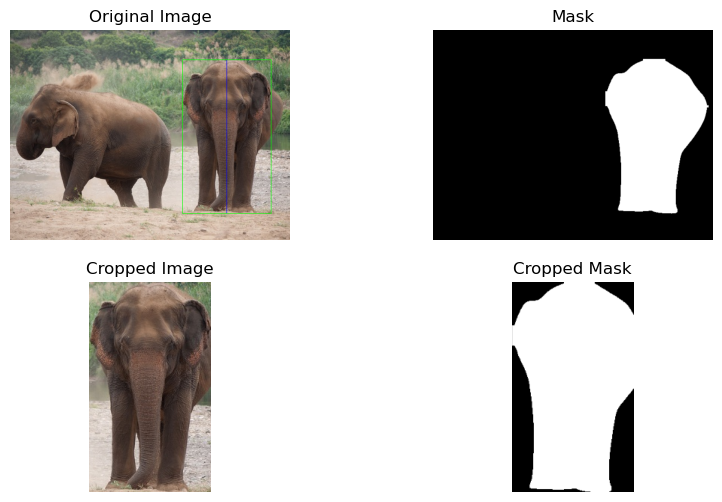

In [11]:
# image_name = 'MIRFLICKR25 - im12013.jpg' # 1 element
image_name = 'COCO - 000000372250.jpg'     # 2 elements
# image_name = 'CAT2000 -195.jpg'            # 0 elements

# image_name = 'COCO - 000000150237.jpg'        #testing (3)
row_idx = 0

mask = results[image_name].masks[0].data.cpu().numpy()[0]
mask = cv2.resize(mask, (results[image_name].orig_shape[1], results[image_name].orig_shape[0]))

image = cv2.imread('images/images_nat/' + image_name)

df_image = df[df['file_name'] == image_name]
row = df_image.iloc[row_idx]

cropped_img = display.crop_image(image, row)
cropped_mask = display.crop_image(mask, row)

display_img = image.copy()
display.drawBB(display_img, row)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].imshow(cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(mask, cmap='gray')
ax[0, 1].set_title('Mask')
ax[0, 1].axis('off')

ax[1, 0].imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Cropped Image')
ax[1, 0].axis('off')

ax[1, 1].imshow(cropped_mask, cmap='gray')
ax[1, 1].set_title('Cropped Mask')
ax[1, 1].axis('off')

plt.show()


In [30]:
rmss = []
glcms = []
otsus = []
edge_densities = []

row_copy = row.copy()

for i in tqdm(range(0, 200)):
    row_copy['width_box'] += 1
    row_copy['height_box'] += 1

    cropped_img = display.crop_image(image, row_copy)
    cropped_mask = display.crop_image(mask, row_copy)

    rmss.append(homogeneity.rms(cropped_img, cropped_mask))
    glcms.append(homogeneity.glcm(cropped_img, cropped_mask))
    otsus.append(homogeneity.otsus_method(image, cropped_mask, row_copy))
    edge_densities.append(homogeneity.edge_density(image, cropped_mask, row_copy))

    print(i,cropped_img.shape,rmss[-1])


  4%|▍         | 9/200 [00:00<00:02, 86.87it/s]

0 (282, 163, 3) 33.64692770152878
1 (283, 164, 3) 33.64692770152878
2 (284, 165, 3) 33.61893308554357
3 (285, 166, 3) 33.61893308554357
4 (286, 167, 3) 33.594158138929075
5 (287, 168, 3) 33.594158138929075
6 (288, 169, 3) 33.569964221372445
7 (289, 170, 3) 33.569964221372445
8 (290, 171, 3) 33.54798534571105
9 (291, 172, 3) 33.54798534571105
10 (292, 173, 3) 33.52763579141617
11 (293, 174, 3) 33.52763579141617
12 (294, 175, 3) 33.50860727091835
13 (295, 176, 3) 33.50860727091835
14 (296, 177, 3) 33.49236470655103
15 (297, 178, 3) 33.49236470655103
16 (298, 179, 3) 33.47800989423101


 14%|█▎        | 27/200 [00:00<00:02, 84.96it/s]

17 (299, 180, 3) 33.47800989423101
18 (300, 181, 3) 33.464690555767056
19 (301, 182, 3) 33.464690555767056
20 (302, 183, 3) 33.452005057019754
21 (303, 184, 3) 33.452005057019754
22 (304, 185, 3) 33.44238906280514
23 (305, 186, 3) 33.44238906280514
24 (306, 187, 3) 33.43449180547242
25 (307, 188, 3) 33.43449180547242
26 (308, 189, 3) 33.428302475615745
27 (309, 190, 3) 33.428302475615745
28 (310, 191, 3) 33.42417222058033
29 (311, 192, 3) 33.42417222058033
30 (312, 193, 3) 33.4196149774436
31 (313, 194, 3) 33.4196149774436
32 (314, 195, 3) 33.41680440872467
33 (315, 196, 3) 33.41680440872467
34 (316, 197, 3) 33.41514378076015


 22%|██▎       | 45/200 [00:00<00:01, 85.48it/s]

35 (317, 198, 3) 33.41514378076015
36 (318, 199, 3) 33.41588498654245
37 (319, 200, 3) 33.41588498654245
38 (320, 201, 3) 33.417919826626566
39 (321, 202, 3) 33.417919826626566
40 (322, 203, 3) 33.42256647997176
41 (323, 204, 3) 33.42256647997176
42 (324, 205, 3) 33.4302001433409
43 (325, 206, 3) 33.4302001433409
44 (326, 207, 3) 33.44140907200495
45 (327, 208, 3) 33.44140907200495
46 (328, 209, 3) 33.446615920375386
47 (329, 210, 3) 33.446615920375386
48 (330, 211, 3) 33.449985080357195
49 (331, 212, 3) 33.449985080357195
50 (332, 213, 3) 33.45355750794212
51 (333, 214, 3) 33.45355750794212


 32%|███▏      | 63/200 [00:00<00:01, 81.01it/s]

52 (334, 215, 3) 33.456249117576334
53 (335, 216, 3) 33.456249117576334
54 (336, 217, 3) 33.456249117576334
55 (337, 218, 3) 33.456249117576334
56 (338, 219, 3) 33.456249117576334
57 (339, 220, 3) 33.456249117576334
58 (340, 221, 3) 33.456249117576334
59 (341, 222, 3) 33.456249117576334
60 (342, 223, 3) 33.456249117576334
61 (343, 224, 3) 33.456249117576334
62 (344, 225, 3) 33.456249117576334
63 (345, 226, 3) 33.456249117576334
64 (346, 227, 3) 33.456249117576334
65 (347, 228, 3) 33.456249117576334
66 (348, 229, 3) 33.456249117576334
67 (349, 230, 3) 33.456249117576334


 40%|████      | 81/200 [00:00<00:01, 81.67it/s]

68 (350, 231, 3) 33.456249117576334
69 (351, 232, 3) 33.456249117576334
70 (352, 232, 3) 33.456249117576334
71 (353, 233, 3) 33.456249117576334
72 (354, 233, 3) 33.456249117576334
73 (355, 234, 3) 33.456249117576334
74 (356, 234, 3) 33.456249117576334
75 (357, 235, 3) 33.456249117576334
76 (358, 235, 3) 33.456249117576334
77 (359, 236, 3) 33.456249117576334
78 (360, 236, 3) 33.456249117576334
79 (361, 237, 3) 33.456249117576334
80 (362, 237, 3) 33.456249117576334
81 (363, 238, 3) 33.456249117576334
82 (364, 238, 3) 33.456249117576334
83 (365, 239, 3) 33.456249117576334


 45%|████▌     | 90/200 [00:01<00:01, 78.69it/s]

84 (366, 239, 3) 33.456249117576334
85 (367, 240, 3) 33.456249117576334
86 (368, 240, 3) 33.456249117576334
87 (369, 241, 3) 33.456249117576334
88 (370, 241, 3) 33.456249117576334
89 (371, 242, 3) 33.456249117576334
90 (372, 242, 3) 33.456249117576334
91 (373, 243, 3) 33.456249117576334
92 (374, 243, 3) 33.456249117576334
93 (375, 244, 3) 33.456249117576334
94 (376, 244, 3) 33.456249117576334
95 (377, 245, 3) 33.456249117576334
96 (378, 245, 3) 33.456249117576334
97 (379, 246, 3) 33.456249117576334
98 (380, 246, 3) 33.456249117576334


 54%|█████▎    | 107/200 [00:01<00:01, 75.64it/s]

99 (380, 247, 3) 33.456249117576334
100 (381, 247, 3) 33.456249117576334
101 (381, 248, 3) 33.456249117576334
102 (382, 248, 3) 33.456249117576334
103 (382, 249, 3) 33.456249117576334
104 (383, 249, 3) 33.456249117576334
105 (383, 250, 3) 33.456249117576334
106 (384, 250, 3) 33.456249117576334
107 (384, 251, 3) 33.456249117576334
108 (384, 251, 3) 33.456249117576334
109 (384, 252, 3) 33.456249117576334
110 (384, 252, 3) 33.456249117576334
111 (384, 253, 3) 33.456249117576334
112 (384, 253, 3) 33.456249117576334
113 (384, 254, 3) 33.456249117576334


 62%|██████▎   | 125/200 [00:01<00:00, 78.58it/s]

114 (384, 254, 3) 33.456249117576334
115 (384, 255, 3) 33.456249117576334
116 (384, 255, 3) 33.456249117576334
117 (384, 256, 3) 33.456249117576334
118 (384, 256, 3) 33.456249117576334
119 (384, 257, 3) 33.456249117576334
120 (384, 257, 3) 33.456249117576334
121 (384, 258, 3) 33.456249117576334
122 (384, 258, 3) 33.456249117576334
123 (384, 259, 3) 33.456249117576334
124 (384, 259, 3) 33.456249117576334
125 (384, 260, 3) 33.456249117576334
126 (384, 260, 3) 33.456249117576334
127 (384, 261, 3) 33.456249117576334
128 (384, 261, 3) 33.456249117576334
129 (384, 262, 3) 33.456249117576334
130 (384, 262, 3) 33.456249117576334


 72%|███████▏  | 143/200 [00:01<00:00, 80.33it/s]

131 (384, 263, 3) 33.456249117576334
132 (384, 263, 3) 33.456249117576334
133 (384, 264, 3) 33.456249117576334
134 (384, 264, 3) 33.456249117576334
135 (384, 265, 3) 33.456249117576334
136 (384, 265, 3) 33.456249117576334
137 (384, 266, 3) 33.456249117576334
138 (384, 266, 3) 33.456249117576334
139 (384, 267, 3) 33.456249117576334
140 (384, 267, 3) 33.456249117576334
141 (384, 268, 3) 33.456249117576334
142 (384, 268, 3) 33.456249117576334
143 (384, 269, 3) 33.456249117576334
144 (384, 269, 3) 33.456249117576334
145 (384, 270, 3) 33.456249117576334
146 (384, 270, 3) 33.456249117576334
147 (384, 271, 3) 33.456249117576334
148 (384, 271, 3) 33.456249117576334


 80%|████████  | 161/200 [00:01<00:00, 80.82it/s]

149 (384, 272, 3) 33.456249117576334
150 (384, 272, 3) 33.456249117576334
151 (384, 273, 3) 33.456249117576334
152 (384, 273, 3) 33.456249117576334
153 (384, 274, 3) 33.456249117576334
154 (384, 274, 3) 33.456249117576334
155 (384, 275, 3) 33.456249117576334
156 (384, 275, 3) 33.456249117576334
157 (384, 276, 3) 33.456249117576334
158 (384, 276, 3) 33.456249117576334
159 (384, 277, 3) 33.456249117576334
160 (384, 277, 3) 33.456249117576334
161 (384, 278, 3) 33.456249117576334
162 (384, 278, 3) 33.456249117576334
163 (384, 279, 3) 33.456249117576334
164 (384, 279, 3) 33.456249117576334


 90%|████████▉ | 179/200 [00:02<00:00, 79.37it/s]

165 (384, 280, 3) 33.456249117576334
166 (384, 280, 3) 33.456249117576334
167 (384, 281, 3) 33.456249117576334
168 (384, 281, 3) 33.456249117576334
169 (384, 282, 3) 33.456249117576334
170 (384, 282, 3) 33.456249117576334
171 (384, 283, 3) 33.456249117576334
172 (384, 283, 3) 33.456249117576334
173 (384, 284, 3) 33.456249117576334
174 (384, 284, 3) 33.456249117576334
175 (384, 285, 3) 33.456249117576334
176 (384, 285, 3) 33.456249117576334
177 (384, 286, 3) 33.456249117576334
178 (384, 286, 3) 33.456249117576334
179 (384, 287, 3) 33.456249117576334
180 (384, 287, 3) 33.456249117576334


 94%|█████████▎| 187/200 [00:02<00:00, 76.69it/s]

181 (384, 288, 3) 33.456249117576334
182 (384, 288, 3) 33.456249117576334
183 (384, 289, 3) 33.456249117576334
184 (384, 289, 3) 33.456249117576334
185 (384, 290, 3) 33.456249117576334
186 (384, 290, 3) 33.456249117576334
187 (384, 291, 3) 33.456249117576334
188 (384, 291, 3) 33.456249117576334
189 (384, 292, 3) 33.456249117576334
190 (384, 292, 3) 33.456249117576334
191 (384, 293, 3) 33.456249117576334
192 (384, 293, 3) 33.456249117576334
193 (384, 294, 3) 33.456249117576334
194 (384, 294, 3) 33.456249117576334
195 (384, 295, 3) 33.456249117576334


100%|██████████| 200/200 [00:02<00:00, 80.12it/s]

196 (384, 295, 3) 33.456249117576334
197 (384, 296, 3) 33.456249117576334
198 (384, 296, 3) 33.456249117576334
199 (384, 297, 3) 33.456249117576334


(331, 212, 3)


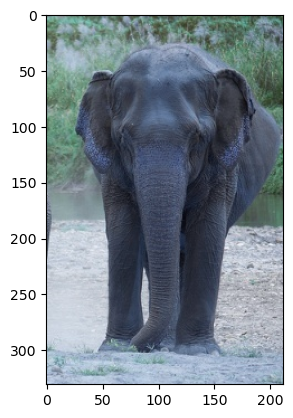

In [37]:
increase = 50

row_copy = row.copy()

row_copy['height_box'] += increase
row_copy['width_box'] += increase

cropped_img = display.crop_image(image, row_copy)
cropped_mask = display.crop_image(mask, row_copy)

print(cropped_img.shape)

plt.imshow(cropped_img)
plt.show()

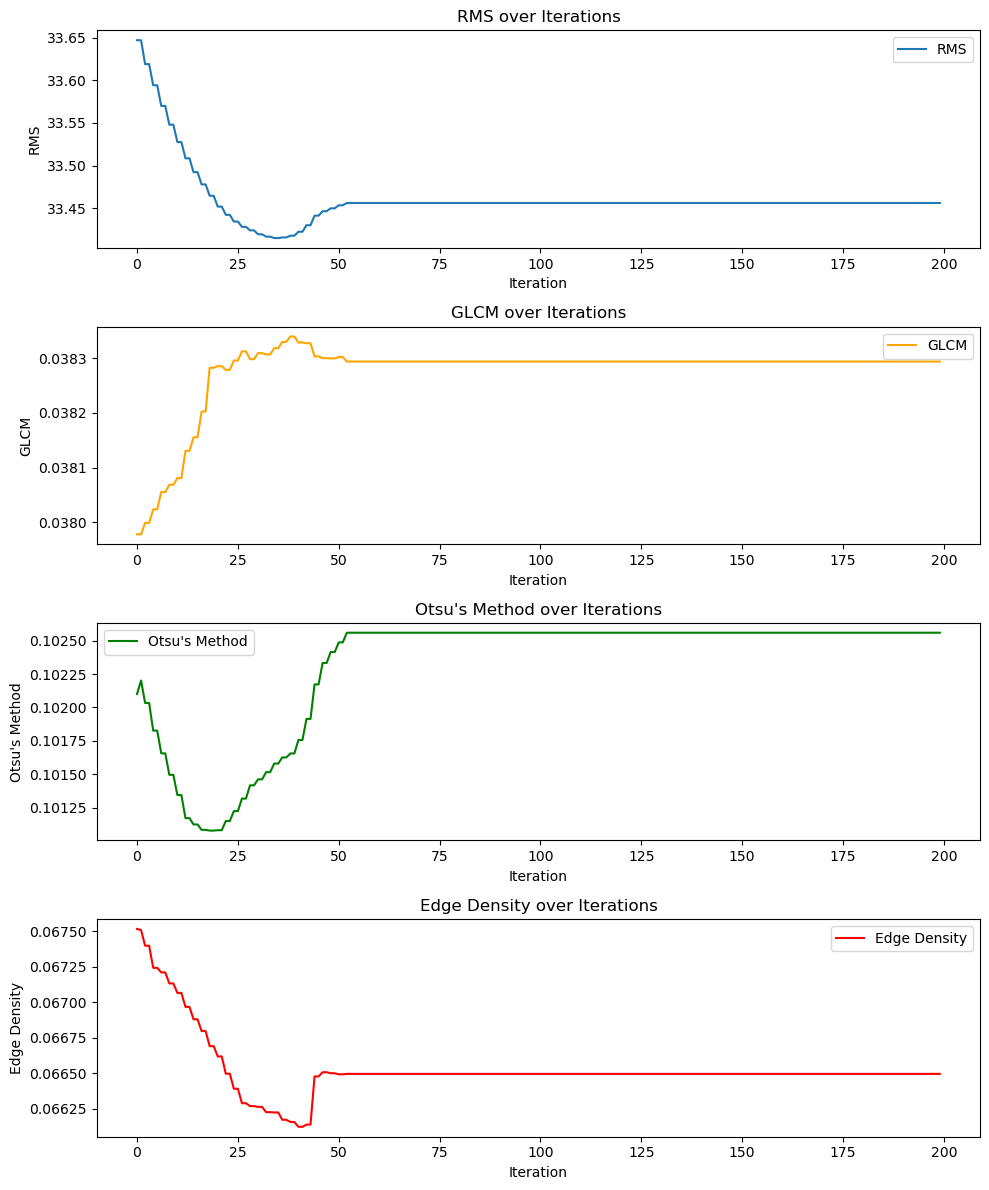

In [5]:
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(rmss, label='RMS')
ax[0].set_title('RMS over Iterations')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('RMS')
ax[0].legend()
ax[1].plot(glcms, label='GLCM', color='orange')
ax[1].set_title('GLCM over Iterations')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('GLCM')
ax[1].legend()
ax[2].plot(otsus, label='Otsu\'s Method', color='green')
ax[2].set_title('Otsu\'s Method over Iterations')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('Otsu\'s Method')
ax[2].legend()
ax[3].plot(edge_densities, label='Edge Density', color='red')
ax[3].set_title('Edge Density over Iterations')
ax[3].set_xlabel('Iteration')
ax[3].set_ylabel('Edge Density')
ax[3].legend()
plt.tight_layout()
plt.show()

In [6]:
# otsus.index(max(otsus))

i = 53

print(rmss[i])
print(glcms[i])
print(otsus[i])
print(edge_densities[i])



33.456249117576334
0.03829424697938146
0.10255894
0.06649553440432279


In [8]:
# max_index = homogeneities.index(max(homogeneities))
# max_index = 37

print(max_index)

row_copy = row.copy()
row_copy['width_box'] += max_index
row_copy['height_box'] += max_index

original_box = image.copy()
display.drawBB(original_box, row)
enlarged_box = image.copy()
display.drawBB(enlarged_box, row_copy)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(cv2.cvtColor(original_box, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Box')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(enlarged_box, cv2.COLOR_BGR2RGB))
ax[1].set_title('Enlarged Box')
ax[1].axis('off')

plt.show()

NameError: name 'max_index' is not defined

# GARBAGE - REMOVE

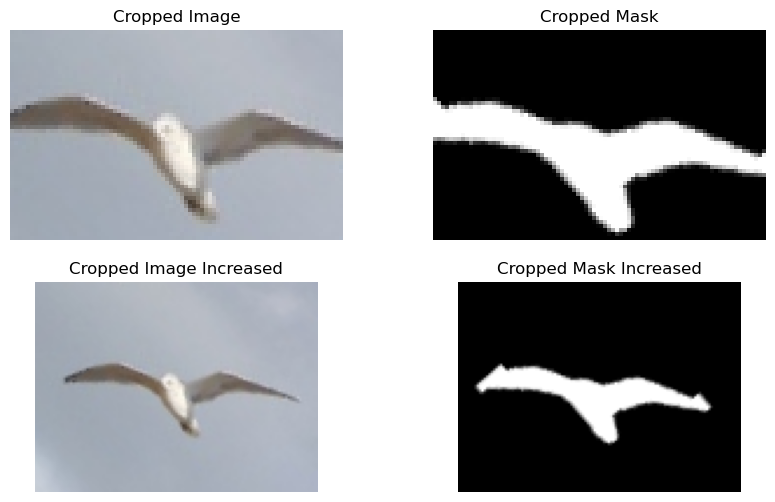

Homogeneity: 0.51849866
Homogeneity: 0.5381261


In [ ]:
row_copy = row.copy()

increase = 37

row_copy['width_box'] += increase
row_copy['height_box'] += increase

cropped_img_increased = display.crop_image(image, row_copy)
cropped_mask_increased = display.crop_image(mask, row_copy)
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('Cropped Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(cropped_mask, cmap='gray')
ax[0, 1].set_title('Cropped Mask')
ax[0, 1].axis('off')

ax[1, 0].imshow(cv2.cvtColor(cropped_img_increased, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Cropped Image Increased')
ax[1, 0].axis('off')

ax[1, 1].imshow(cropped_mask_increased, cmap='gray')
ax[1, 1].set_title('Cropped Mask Increased')
ax[1, 1].axis('off')

plt.show()

print('Homogeneity:', homogeneity.otsus_method(image, cropped_mask, row))
print('Homogeneity:', homogeneity.otsus_method(image, cropped_mask_increased, row_copy))


100%|██████████| 100/100 [00:00<00:00, 504.30it/s]


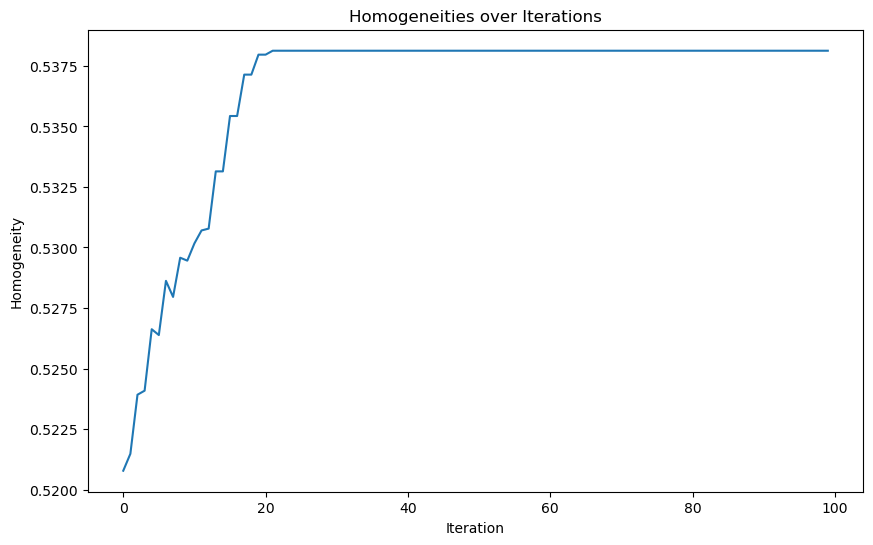

In [ ]:
homogeneities = []

row_copy = row.copy()

for i in tqdm(range(0, 100)):
    row_copy['width_box'] += 1
    row_copy['height_box'] += 1

    cropped_img = display.crop_image(image, row_copy)
    cropped_mask = display.crop_image(mask, row_copy)

    homogeneities.append(homogeneity.otsus_method(image, cropped_mask, row_copy))



plt.figure(figsize=(10, 6))
plt.plot(homogeneities)
plt.title('Homogeneities over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Homogeneity')
plt.show()

In [ ]:
max_index = homogeneities.index(max(homogeneities))
print(max_index)

37


In [ ]:
homogeneities[11]

0.5307035

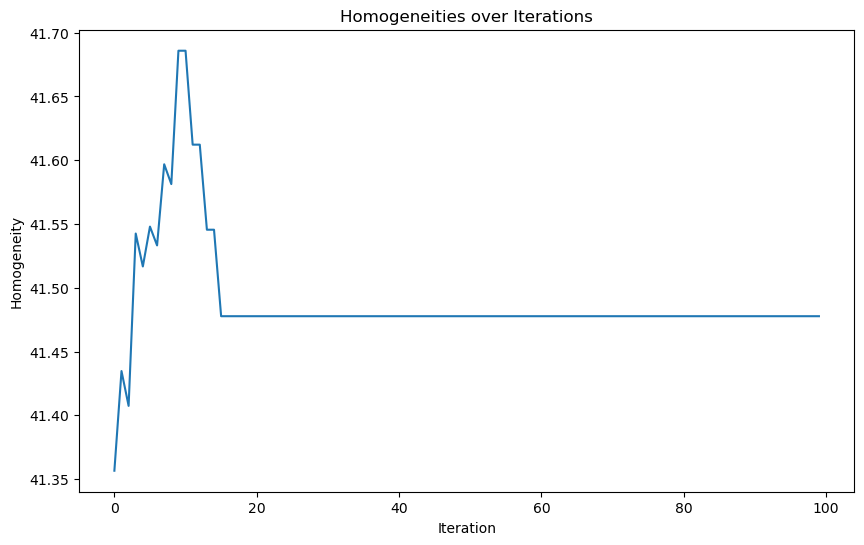

In [ ]:
homogeneities = []

row_copy = row.copy()

for i in range(0, 100):
    row_copy['width_box'] += 1
    row_copy['height_box'] += 1

    cropped_img = display.crop_image(image, row_copy)
    cropped_mask = display.crop_image(mask, row_copy)

    homogeneities.append(homogeneity.rms(cropped_img, cropped_mask))



plt.figure(figsize=(10, 6))
plt.plot(homogeneities)
plt.title('Homogeneities over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Homogeneity')
plt.show()